# Problem 2: Working with MNIST

Let’s move to MNIST, a benchmark dataset of handwritten digits, that has approximately 70,000 example images from 10 classes. Each 2-dimentional image is of size ‘28 × 28’, and belongs to one of the categories ‘0-9’.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

\\ PRoblem2

In [27]:
# Problem 2.i
from torchvision import datasets
data = datasets.MNIST('data', train=True, download=True)
X_numpy = data.train_data.numpy()
y_numpy = data.train_labels.numpy()
print(X_numpy.shape, y_numpy.shape)

(60000, 28, 28) (60000,)


In [29]:
def draw_MNIST(image, label = ''):
    plt.imshow(image, cmap='gray')
    plt.title(label)

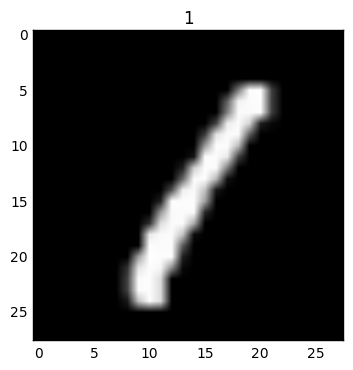

In [30]:
img_ind = 3
draw_MNIST(X_numpy[img_ind], y_numpy[img_ind])

In [25]:
# Problem 2.ii (Vectorizing)
X_numpy_vec = X_numpy.reshape(60000,-1)

# Problem 2.iii (Split)
N_train = 40000
train_img = X_numpy_vec[0:N_train,]
train_label = y_numpy[0:N_train,]
print(train_img.shape, train_label.shape)

test_img = X_numpy_vec[N_train:,]
test_label = y_numpy[N_train:]
print(test_img.shape, test_label.shape)

(40000, 784) (40000,)
(20000, 784) (20000,)


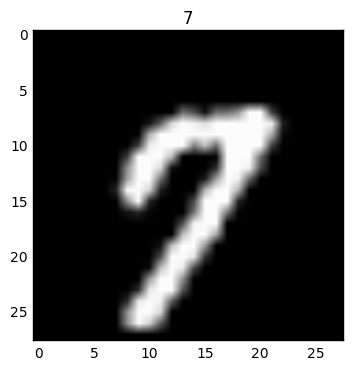

In [31]:
# Test whether drawin the image still works
draw_MNIST(test_img[1,].reshape((28,28)), test_label[1])

In [72]:
# Problem 2.iv
batch_size = 4
def mbatch_MNIST(img, label, ind):
    sample_img = img[ind,]
    sample_label = label[ind]
    return (sample_img, sample_label)

ind = np.random.permutation(train_label.size).reshape(-1,batch_size)

(4, 784) (4,)


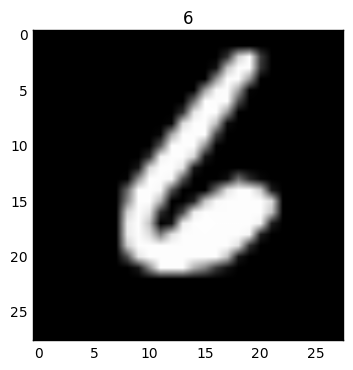

In [73]:
batch_number = 2
sample_number = 3
sample_img, sample_label = mbatch_MNIST(train_img, train_label, ind[batch_number])
print(sample_img.shape, sample_label.shape)
draw_MNIST(sample_img[sample_number,].reshape((28,28)), sample_label[sample_number])

(100, 1, 28, 28)


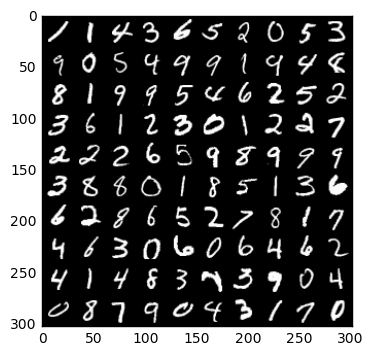

In [7]:
import torch
from torchvision.utils import make_grid
examples = X_numpy[np.random.choice(range(60000),100),:,:][:,None,:,:]/255.
print(examples.shape)
plt.imshow(make_grid(torch.FloatTensor(examples), nrow=10).permute(1,2,0))